In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier



In [ ]:
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [ ]:
d={}
for i in range(561):
  x=features[i]
  if x not in d:
    d[x]=1
  else:
    features[i]=x+str(d[x])
    d[x]+=1

print(len(set(features)))

561


In [ ]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None,mangle_dupe_cols=True, names=features)

# add subject column to the dataframe
#x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
583,0.266333,-0.021374,-0.093461,-0.994942,-0.99464,-0.994633,-0.99523,-0.993334,-0.994531,-0.942839,-0.574657,-0.81734,0.844826,0.691509,0.849655,-0.989429,-0.999941,-0.999942,-0.999592,-0.994697,-0.991681,-0.992495,-0.826873,-0.911601,-0.38665,0.137183,-0.145237,0.035,0.095439,0.258088,-0.165825,0.203241,-0.023885,0.309905,-0.317632,0.406194,-0.353147,-0.041783,-0.065999,-0.278195,...,-0.999964,-0.995112,-1.0,0.142857,0.389123,-0.714497,-0.946262,-0.996258,-0.994816,-0.994943,-0.995665,-0.997164,-0.996258,-0.99997,-0.996226,-0.924075,-1.0,0.02926,-0.419712,-0.766673,-0.999185,-0.998736,-0.99838,-0.999158,-0.999376,-0.999185,-0.999997,-0.997588,-1.0,-1.0,0.334314,-0.72035,-0.929431,0.034248,-0.377427,0.258314,-0.265185,0.392094,-0.65414,-0.31259


In [ ]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
#X_test['subject'] = pd.read_csv('subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
2177,0.253873,0.009288,-0.010252,-0.420931,-0.073919,-0.422823,-0.479723,-0.093226,-0.447384,-0.147904,-0.047771,-0.425192,0.47086,0.251628,0.403821,-0.286988,-0.830894,-0.832574,-0.832971,-0.592131,-0.318436,-0.545354,0.153935,0.339468,0.480405,-0.387892,0.118115,0.101905,0.105758,-0.27051,-0.050657,0.553517,-0.361111,-0.024427,-0.092363,0.104235,0.062468,-0.398361,-0.404812,0.220372,...,-0.93064,-0.595175,0.062371,-0.904762,-0.115157,-0.354443,-0.68783,-0.578762,-0.20855,-0.358807,-0.200994,-0.973235,-0.578762,-0.720779,-0.771391,0.281896,-1.0,-0.639874,0.139289,-0.262985,-0.814796,-0.887838,-0.852301,-0.927919,-0.977231,-0.814796,-0.986402,-0.797053,-0.04986,-0.68254,0.176717,-0.900529,-0.988118,0.360048,-0.63963,-0.952736,0.190759,-0.548712,0.3106,0.247997


In [ ]:
train.shape

(7352, 561)

In [ ]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred_test = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred_test)

0.9270444519850696

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=200)
et.fit(X_train, y_train)
y_pred_test = et.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.9446895147607737

In [ ]:
rfaccs=[]
etaccs=[]
for x in [100,500,1000,3000,5000,6000,7000]:
  rfc.fit(X_train[:x], y_train[:x])
  p1 = accuracy_score(y_test[:x], rfc.predict(X_test[:x]))
  p1*=100
  rfaccs.append(p1)
  et.fit(X_train[:x], y_train[:x])
  p2 =  accuracy_score(y_test[:x], et.predict(X_test[:x]))
  p2*=100
  etaccs.append(p2)
  print(x,"RF {:.2f} ".format(p1),"\t","ET {:.2f}".format(p2))
  
  print()


100 RF 76.00  	 ET 76.00

500 RF 75.80  	 ET 85.80

1000 RF 90.60  	 ET 91.40

3000 RF 86.22  	 ET 90.02

5000 RF 90.87  	 ET 93.45

6000 RF 92.33  	 ET 93.72

7000 RF 92.81  	 ET 93.72



In [ ]:
rfaccs.append(92.8)
etaccs.append(94.7)
print(rfaccs)
print(etaccs)

[76.0, 73.2, 90.5, 87.47879199185611, 91.58466236851035, 91.55072955548015, 92.67051238547675, 92.8]
[77.0, 83.2, 90.5, 90.77027485578554, 93.55276552426196, 93.85816084153376, 93.72242958941295, 94.7]


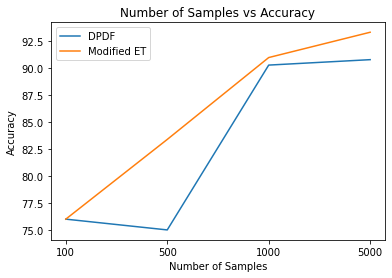

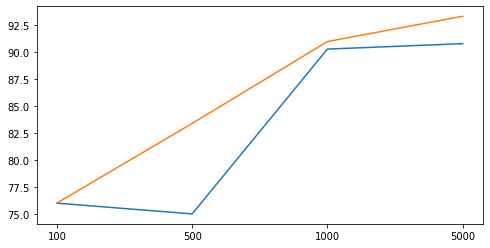

In [ ]:
x=['100','500','1000','5000']
#print(rfaccs[:3]+[rfaccs[4]])
plt.plot(x,rfaccs[:3]+[rfaccs[4]],label="DPDF")
plt.plot(x,etaccs[:3]+[etaccs[4]],label="Modified ET")
plt.xlabel("Number of Samples")
plt.ylabel("Accuracy")
plt.title("Number of Samples vs Accuracy")
plt.legend()
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(4)
plt.plot(x,rfaccs[:3]+[rfaccs[4]],label="DPDF")
plt.plot(x,etaccs[:3]+[etaccs[4]],label="Modified ET")
plt.show()

In [ ]:
rfs=[]
ets=[]
for x in [100,200,250,300]:
    rfc = RandomForestClassifier(n_estimators=x)
    rfc.fit(X_train, y_train)
    p1=accuracy_score(y_test, rfc.predict(X_test))
    p1*=100
    rfs.append(p1)
    et = ExtraTreesClassifier(n_estimators=x)
    et.fit(X_train, y_train)
    p2=accuracy_score(y_test, et.predict(X_test))
    p2*=100
    ets.append(p2)
    print(x,"RF {:.2f} ".format(p1),"\t","ET {:.2f}".format(p2))


100 RF 92.30  	 ET 94.27
200 RF 92.74  	 ET 93.86
250 RF 92.53  	 ET 94.27
300 RF 92.84  	 ET 94.06
